# Minitrabalho 1 – Filtro colaborativo

## 1) Algoritmo de força-bruta


#### 1.a) [1 valor] Descreva brevemente qual seria o algoritmo de força-bruta que resolve o problema do número de inversões num array.

__R:__ O algoritmo de força-bruta que resolve o problema do número de inversões num array seria percorrer o array e para cada elemento, percorrer o restante do array e verificar se o elemento atual é maior do que o elemento que estamos a comparar. Caso seja, incrementa-se o contador de inversões. No final, devolve-se o contador de inversões que contém o número de inversões no array.

#### 1.b) [1 valor] Implemente em Python o algoritmo descrito na alínea anterior. O algoritmo deve receber como entrada uma coleção de inteiros, e devolver o número de inversões encontrados nesta coleção.

In [2]:
def count_inversions_brute_force(arr):
    count = 0
    n = len(arr)
    for i in range(n):                  
        for j in range(i+1, n):         
            if arr[i] > arr[j]:         
                count += 1
    return count

#### 1.c) [3 valores] Apresente uma análise assintótica do seu algoritmo, considerando o número de acessos ao array (ou seja, o número de acessos para leitura e escrita de uma posição do array) que são executados para o seu algoritmo em função do tamanho, n, do array. Nota: É esperado que sejam apresentados os cálculos completos do número de acessos assim como a correspondente conclusão sobre o tempo de execução do algoritmo (utilizando notação assintótica).

**R: Análise assintótica do algoritmo:**

Quando se obtém o tamanho do array acede-se 1 vez à memória: `n = len(arr)`

No loop externo, faz-se variar `i` de `0` a `n-1`, enquanto que no loop interno faz-se variar `j` de `i+1` a `n-1`, pelo que dentro dos loops se aceda à memória 2 vezes em cada iteração `(if arr[i] > arr[j]:)`:

$$
\sum_{i=0}^{n-1} \sum_{j=i+1}^{n-1} 2
$$

Percebe-se que para cada iteração `i`, o loop internoio executa-se `n-i-1` vezes pelo que podemos simplificar a expressão para:

$$
\sum_{i=0}^{n-1} 2*(n - i - 1)
$$

Por sua vez, deparamo-nos com uma soma de sucessões aritméticas, e assim temos:

$$
2 * \frac{n*(n-1)}{2} = n^2 - n
$$

Finalmente, em termos de notação assintótica descartamos os termos constantes e de ordem inferior pelo que o algorimo tem uma complexidade de:

$$\Theta(n^2)$$






## 2) Algoritmo dividir-e-conquistar

#### 2.a) [3 valores] Proponha uma solução melhorada que utilize a estratégia dividir-e-conquistar para resolver o problema do número de inversões num array de forma mais eficiente. 
Nota: É esperado que sejam descritos os passos básicos para a conceção do seu algoritmo. Deve também apresentar o pseudocódigo correspondente.

Dica: A solução passará por utilizar um dos algoritmos de ordenação abordados nas aulas.

**R:** Uma solução que utiliza a estratégia dividir-e-conquistar que resolve o problema do número de inversões seria criar uma adaptação do Merge Sort que conta o numero de inversões durante o processo de ordenação.

Inicialmente verifica-se se o array é constituído por 1 ou 0 elementos e caso o seja o número de inversões é 0 uma vez que o array se encontra já ordenado

Seguidamente divide-se a lista em duas metades(left e right) e aplica-se recursivamente o algoritmo a ambas as metades

Numa outra função combinamos as duas metades ordenadas e durante a mesclagem, se um elemento da metade left for maior que um elemento da metade right, incrementa o contador pelo numero de elementos nao analisados na metade left

**R:** **Pseudocódigo:**

**mergeSortInversions**(arr):
```pseudo
    //Conta o número de inversões de um array
    //Input: arr corresponde ao array do qual se pretende calcular o número de inversões
    //Output: retorna o total de inversões do array arr
    
    if tamanho(arr) <= 1:
        retornar 0
    else:
        meio = ⌊tamanho(arr)/2⌋  // Calcula o valor do índice do meio do array, usando o floor para quando o array tem tamanho ímpar 
        esquerda = arr[:meio]   // Define o array esquerda com todos os índice do arr até ao índice meio
        direita = arr[meio:]    // Define o array direita com todos os índices do arr a partir do índice meio
        contagem = mergeSortInversions(esquerda)
        contagem += mergeSortInversions(direita)
        contagem += merge(esquerda, direita, arr)
        retornar contagem
```


**merge**(esquerda, direita, arr):
```pseudo
    //O algoritmo implementado é uma variação do algoritmo de ordenação Merge Sort que conta o número de inversões em um array.
    //Input: O algoritmo recebe como entrada um array não ordenado.
    //Output: O algoritmo retorna o número total de inversões presentes no array.

    i, j, k, contagem = 0, 0, 0, 0
    while i < tamanho(esquerda) e j < tamanho(direita):
        if esquerda[i] <= direita[j]:
            arr[k] = esquerda[i]
            i += 1
        else:
            arr[k] = direita[j]
            j += 1
            contagem += (tamanho(esquerda) - i)
        k += 1
    endwhile

    while i < tamanho(esquerda):
        arr[k] = esquerda[i]
        i += 1
        k += 1
    endwhile

    while j < tamanho(direita):
        arr[k] = direita[j]
        j += 1
        k += 1
    endwhile
    
    retornar contagem
```

#### 2.b) [2 valores] Implemente em Python o algoritmo descrito na alínea anterior. O algoritmo deve receber como entrada uma coleção de inteiros, e devolver o número de inversões encontrados nesta coleção.

In [3]:
def mergeSortInversions(arr):
    if len(arr) <= 1:
        return 0
    else:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        count = mergeSortInversions(left)
        count += mergeSortInversions(right)
        count += merge(left, right, arr)
        return count
    
def merge(left, right, arr):
    i,j,k,count = 0,0,0,0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
            count += (len(left) - i)
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1
    return count

#### 2.c) [3 valores] Utilizando o método de indução, mostre que o seu algoritmo está correto.
Nota: Inicie por apresentar um pseudocódigo simplificado do seu algoritmo (se ainda não o fez na
alínea 2.a)). Para facilitar, pode também considerar que o tamanho n do array é uma potência de 2.

**R:** **Caso Base (`len(arr)<=1`):** Numa lista com 1 ou 0 elementos não há inversões, pelo que o algoritmo devolve `0`

**Hipótese de Indução:** O algoritmo `mergeSortInversions` calcula corretamente o número de inversões para todos os arrays de tamanho menor que `n`.


**Passo Indutivo:** Supondo que o algoritmo está correto para todas as listas com tamanho menor que `n`, temos de provar que o algoritmo é correto para uma lista de tamanho `n`.

O algoritmo divide a lista em duas metades, `left` e `right`, e recursivamente determina o numero de inversões em cada uma das metades. Como cada metade tem tamanho menor que `n` pela H.I., sabemos que o algoritmo calcula corretamente o numero de inversoes em cada metade

Seguidamente, o algoritmo calcula as inversões entre as duas metades na função `merge`. Quando um elemento em `right` é menor que um elemento em `left`, sabemos que há `(len(left) - i)` inversões, uma vez que `left` e `right` estão ordenados. Portanto, o algoritmo calcula corretamente as inversões entre as duas metades.

**Conclusão:** Assim, o algoritmo `mergeSortInversions` calcula corretamente o número total de inversões em um array de tamanho `n`.




#### 2.d) [3 valores] Apresente uma análise assintótica do seu algoritmo, utilizando uma das técnicas abordadas em aula, ou seja, o teorema principal, ou o método da indução e substituição.
Nota: É esperado que apresente a fórmula recorrente do cálculo do trabalho do seu algoritmo bem
como os passos necessários para estabelecer a ordem de complexidade do algoritmo (utilizando
notação assintótica).

**R: Análise assintótica do algoritmo:**

Fórmula recorrente geral para o algoritmo:
$$
T(n) = 2 \cdot T\left(\frac{n}{2}\right) + \Theta(n)
$$
No qual, `T(n)` corresponde ao tempo de execução, `n` corresponde ao tamanho do array input do algoritmo e `Θ(n)` corresponde ao tempo necessário para a mesclagem.

Pelo Teorema Principal:
$$
T(n) = \begin{cases}
\Theta(1) & \text{se } n = 1 \\
a \cdot T\left(\frac{n}{b}\right) + f(n) & \text{senão}
\end{cases}
$$
$$
\text{Onde:}
\begin{cases}
1. & \text{Se } a < b^d \rightarrow T(n) = O(n^d) \\
2. & \text{Se } a = b^d \rightarrow T(n) = O(n^d \log n) \\
3. & \text{Se } a > b^d \rightarrow T(n) = O(n^{\log_b a})
\end{cases}
$$

Pelo teorema, temos:
\begin{align*}
a & = 2, \\
b & = 2, \\
d & = 1
\end{align*}

Sendo assim, a = b<sup>d</sup>  pelo que:

$$
T(n) = \Theta(n^1 \cdot log_2(n))
$$ 
Ou seja,
$$
T(n) = \Theta(n \cdot \log_2 n)
$$ 

#### 3.a) [1 valores] Crie uma bateria de testes e cronometre o tempo de execução de cada um dos algoritmos desenvolvidos em 1) e 2). Repita cada cronometragem, pelo menos, 35 vezes e registe o tempo médio de execução para cada algoritmo.
Nota: Exatamente a mesma coleção deve ser gerada antes das invocações dos diferentes algoritmos
nos respetivos testes. Esta coleção deve conter números inteiros aleatórios sem repetição.

In [4]:
import time
import random
import numpy as np

def n_log_n(arr):
    size = len(arr)
    print(size * np.log(size))
    return size * np.log(size)

NUMBER_OF_TESTS = 35
def test_sorting_algorithm(algorithm, array_size):
    array = list(range(array_size))
    random.shuffle(array)
    start_time = time.time()

    for _ in range(NUMBER_OF_TESTS):
        algorithm(list(array))
    
    end_time = time.time()
    return (end_time - start_time) / NUMBER_OF_TESTS

#### 3.b) [2 valores] Faça o plot dos tempos de execução dos dois algoritmos propostos em 1) e em 2). Que conclusões tira?
Nota: É esperado que verifique se é possível estabelecer ligações entre as ordens de complexidade de
cada algoritmo.

0.0006643856189774724
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
[0.00020052364894321986, 0.0007429804120744978, 0.002085678918021066, 0.003276559284755162, 0.005108622142246791, 0.00781571524483817, 0.010561554772513254, 0.013657535825456892, 0.016947644097464427, 0.02088616234915597, 0.026372970853533063, 0.03216652870178223, 0.03720376832144601, 0.04281622341700963, 0.04760112762451172, 0.055957467215401784, 0.062410797391619, 0.06968509129115513, 0.07621822357177735]
[0.00011379378182547433, 0.0002433300018310547, 0.0003715038299560547, 0.0005143369947160993, 0.0006572246551513672, 0.0008004529135567801, 0.0009861060551234653, 0.0010857241494315012, 0.001254401888166155, 0.0014571802956717356, 0.0017003468104771205, 0.0019582407815115794, 0.001989814213344029, 0.0022584642682756694, 0.0023286887577601842, 0.0024719578879220144, 0.0026096139635358537, 0.002923727035522461, 0.002852330889020647]
[0.0006643856189774724, 0.0015287712379549448,

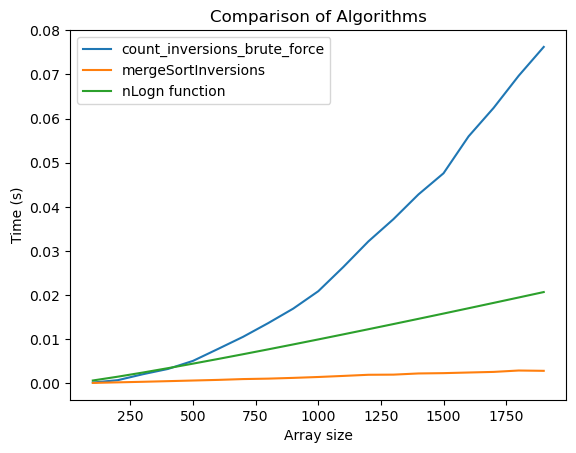

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def n_log_n(size):
    return size * np.log2(size)/1000000

print(n_log_n(100))

def plot_test_results():
    array_sizes = list(range(100, 2000, 100))
    times_brute_force = []
    times_merge_sort = []
    times_n_log_n = []
    

    for size in array_sizes:
        times_brute_force.append(test_sorting_algorithm(count_inversions_brute_force, size))
        times_merge_sort.append(test_sorting_algorithm(lambda arr: mergeSortInversions(arr), size))
        times_n_log_n.append(n_log_n(size))
        print(size)
    print(times_brute_force)
    print(times_merge_sort)
    print(times_n_log_n)   

    plt.plot(array_sizes, times_brute_force, label='count_inversions_brute_force')
    plt.plot(array_sizes, times_merge_sort, label='mergeSortInversions')
    plt.plot(array_sizes, times_n_log_n, label='nLogn function')
    plt.xlabel('Array size')
    plt.ylabel('Time (s)')
    plt.title('Comparison of Algorithms')
    plt.legend()
    plt.show()

plot_test_results()


**R:** **Conclusão:** Podemos observar que o tempo de execução do algoritmo de força-bruta aumenta rapidamente à medida que o tamanho do array aumenta, enquanto que o tempo de execução do algoritmo baseado no Merge Sort aumenta muito mais lentamente. Isso ilustra a eficiência superior do algoritmo `mergeSortInversions` para arrays grandes. No entanto, para arrays muito pequenos, a diferença de tempo pode não ser significativa.

## 4) Extra

#### 4.a) [1 valor] Proponha possíveis melhorias ao algoritmo apresentado em 2) e refaça os testes empíricos realizados em 3) para avaliar se as melhorias são visíveis na prática.
Nota: É esperado que fundamente o porquê de estar a propor cada melhoria. É também esperada uma
breve discussão sobre a ordem de complexidade do algoritmo melhorado.

**R:Possíveis melhoria ao Algoritmo apresentado em 2:**

Utilização do Algoritmo do BruteForce, apresentado em 2b., para Arrays de tamanho menor ao igual a 10. Desta forma, conseguimos utilizar o melhor dos dois Algoritmos, o count_inversions_brute_force para a contagem de arrays pequenos e o merge para arrays maiores.


In [6]:

def mergeSortInversionsImproved(arr):
    return mergeSortInversions(arr)
    
def mergeSortImproved(left, right, arr):
    BRUTEFORCE_ARRAY_LIMIT = 10
    
    if(len(arr) <= BRUTEFORCE_ARRAY_LIMIT):
        return count_inversions_brute_force(arr)
    elif(len(left) <= BRUTEFORCE_ARRAY_LIMIT):
        return count_inversions_brute_force(left)
    elif(len(right) <= BRUTEFORCE_ARRAY_LIMIT):
        return count_inversions_brute_force(right)
    else:
    
        return merge(left, right, arr)


#testes
array = list(range(10000))
random.shuffle(array)
print(array)
arrayCopy = array.copy()
arrayBr = array.copy()
print(arrayCopy)
print(arrayBr)
print("MegeSort original :", mergeSortInversions(array))
print("MegeSort melhorado:", mergeSortInversionsImproved(arrayCopy))
print("Bruteforce:", count_inversions_brute_force(arrayBr))
print(array)
print(arrayCopy)
print(arrayBr)

[5787, 8232, 975, 8872, 7512, 4635, 9883, 7060, 8675, 2392, 5785, 8269, 243, 7652, 3218, 3395, 4595, 8211, 8853, 8826, 7641, 1201, 4202, 4260, 303, 1393, 5460, 1112, 501, 3361, 6111, 306, 9268, 2510, 7264, 5577, 103, 4796, 9442, 4031, 6636, 8178, 53, 1887, 140, 7761, 9967, 9648, 1674, 4490, 6674, 3297, 473, 5717, 1728, 641, 8497, 1426, 6209, 1677, 2100, 7811, 2607, 6921, 5819, 9800, 1858, 1189, 2935, 4898, 1318, 5642, 44, 5101, 2809, 9408, 6501, 1850, 4076, 3699, 9924, 3538, 263, 7649, 7091, 5404, 5358, 1382, 1323, 7171, 3993, 3677, 1351, 5681, 3449, 5212, 5854, 1278, 8323, 8807, 3613, 6, 8219, 2564, 981, 5252, 7433, 2973, 205, 3493, 1090, 128, 5508, 4870, 718, 9216, 3424, 9098, 470, 6512, 5701, 7947, 2371, 2496, 6171, 246, 1584, 6144, 972, 914, 5887, 313, 5987, 3399, 3536, 9975, 9777, 2057, 3280, 9080, 5920, 9359, 363, 3354, 1052, 618, 2206, 657, 8450, 6625, 559, 4612, 1509, 2942, 1464, 9100, 4828, 2799, 4057, 5124, 2353, 3946, 8610, 1423, 672, 3832, 2694, 9696, 9458, 2842, 8032, 791,

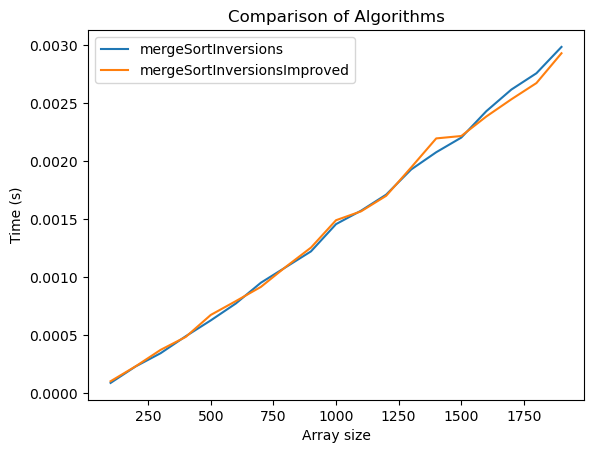

In [7]:
def plot_test_results1():
    array_sizes = list(range(100, 2000, 100))
    times_brute_force = []
    times_merge_sort = []
    times_merge_sort_improved = []

    for size in array_sizes:
        times_brute_force.append(test_sorting_algorithm(count_inversions_brute_force, size))
        times_merge_sort.append(test_sorting_algorithm(lambda arr: mergeSortInversions(arr), size))
        times_merge_sort_improved.append(test_sorting_algorithm(lambda arr: mergeSortInversionsImproved(arr), size))

    #plt.plot(array_sizes, times_brute_force, label='count_inversions_brute_force')
    plt.plot(array_sizes, times_merge_sort, label='mergeSortInversions')
    plt.plot(array_sizes, times_merge_sort_improved, label='mergeSortInversionsImproved')
    plt.xlabel('Array size')
    plt.ylabel('Time (s)')
    plt.title('Comparison of Algorithms')
    plt.legend()
    plt.show()


plot_test_results1()

**R:** A eficiência dos dois algoritmos depende do tamanho do array e da distribuição dos valores. Para arrays grandes com muitos elementos desordenados, o primeiro algoritmo pode ser mais eficiente. Para arrays pequenos ou arrays grandes com poucos elementos desordenados, o segundo algoritmo pode ser mais eficiente. Contudo, ambos os algoritmos são de ordem $$ \Theta(n \cdot \log_2 n) $$

## 5) Questões Éticas

#### Tente resolver os problemas apenas com os integrantes do seu grupo antes de colaborar. Escreva as suas respostas por suas próprias palavras. Nunca deve partilhar o ficheiro fonte com as suas soluções com integrantes de outros grupos

#### 5.a) Se colaborou com alguém fora do seu grupo, indique aqui os respetivos nomes.

#### 5.b) Deve citar todas as fontes que utilizou fora do material da UC.

Escrita em latex: 

https://pt.overleaf.com/learn/latex/Integrals%2C_sums_and_limits

https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols

